In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import murraylab_tools.biotek as btek
import itertools

%matplotlib qt5
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler
import numpy as np

mpl.font_manager._rebuild()
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

%matplotlib inline
%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Roboto'], 
                 'serif': ['Roboto'],'weight':'normal'})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(8.5,15))

In this Jupyter notebook, we will take all of the biotek data for the 8 plate generations of this T7RNAP differentiation experiment, and ultimately output a dataframe that has the ending sfYFP reading for each plate generation, condition, and replicate in a tidy data frame. We plot the timecourse data here, but will only use the dataframe we ouput with ending sfYFP values to generate the corresponding portion of figure 4 (also using the data from the replicate experiment).

In [19]:
# Generate tidy dataframes for biotek data utilizing supplementary data csv describing conditions in each well
btek.tidy_biotek_data('./20190204_T7diff_plate1.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190204_T7diff_metadata_biotek.csv')
btek.tidy_biotek_data('./20190204_T7diff_plate2.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190204_T7diff_metadata_biotek.csv')
btek.tidy_biotek_data('./20190204_T7diff_plate3.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190204_T7diff_metadata_biotek.csv')
btek.tidy_biotek_data('./20190204_T7diff_plate4.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190204_T7diff_metadata_biotek.csv')
btek.tidy_biotek_data('./20190204_T7diff_plate5.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190204_T7diff_metadata_biotek.csv')
btek.tidy_biotek_data('./20190204_T7diff_plate6.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190204_T7diff_metadata_biotek.csv')
btek.tidy_biotek_data('./20190204_T7diff_plate7.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190204_T7diff_metadata_biotek.csv')
btek.tidy_biotek_data('./20190204_T7diff_plate8.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190204_T7diff_metadata_biotek.csv')

C:\Users\Rory\Anaconda3\lib\site-packages\murraylab_tools\biotek\biotek.py:289: UserWarning: Unknown plate reader id 'Unknown'; will not attempt to calculate molarity concentrations.
  "concentrations.") % line[1])


Now we will generate a dataframe containing the tidy data for all plates, adding the identifier of which plate the data is from:

In [20]:
data_p1 = pd.read_csv('./20190204_T7diff_plate1_tidy.csv')
data_norm_p1 = btek.normalize(data_p1)

OD_data_p1 = data_p1.loc[data_p1.Channel=='OD600',:]
YFP_data_p1 = data_p1.loc[(data_p1.Channel=='sfYFP') & (data_p1.Gain==61),:]
YFP_norm_p1 = data_norm_p1.loc[(data_norm_p1.Channel=='sfYFP') & (data_norm_p1.Gain==61),:]

OD_data_concat = OD_data_p1.copy()
YFP_data_concat = YFP_data_p1.copy()
YFP_norm_concat = YFP_norm_p1.copy()

OD_data_concat['plate'] = 1
YFP_data_concat['plate'] = 1
YFP_norm_concat['plate'] = 1

In [21]:
data_p2 = pd.read_csv('./20190204_T7diff_plate2_tidy.csv')
data_norm_p2 = btek.normalize(data_p2)

OD_data_p2 = data_p2.loc[data_p2.Channel=='OD600',:]
YFP_data_p2 = data_p2.loc[(data_p2.Channel=='sfYFP') & (data_p2.Gain==61),:]
YFP_norm_p2 = data_norm_p2.loc[(data_norm_p2.Channel=='sfYFP') & (data_norm_p2.Gain==61),:]

OD_data_p2_copy = OD_data_p2.copy()
YFP_data_p2_copy = YFP_data_p2.copy()
YFP_norm_p2_copy = YFP_norm_p2.copy()

OD_data_p2_copy['Time (hr)'] += (10/60 + OD_data_concat['Time (hr)'].max())
YFP_data_p2_copy['Time (hr)'] += (10/60 + YFP_data_concat['Time (hr)'].max())
YFP_norm_p2_copy['Time (hr)'] += (10/60 + YFP_norm_concat['Time (hr)'].max())

OD_data_p2_copy['plate'] = 2
YFP_data_p2_copy['plate'] = 2
YFP_norm_p2_copy['plate'] = 2

OD_data_concat = pd.concat([OD_data_concat, OD_data_p2_copy])
YFP_data_concat = pd.concat([YFP_data_concat, YFP_data_p2_copy])
YFP_norm_concat = pd.concat([YFP_norm_concat, YFP_norm_p2_copy])

In [22]:
data_p3 = pd.read_csv('./20190204_T7diff_plate3_tidy.csv')
data_norm_p3 = btek.normalize(data_p3)

OD_data_p3 = data_p3.loc[data_p3.Channel=='OD600',:]
YFP_data_p3 = data_p3.loc[(data_p3.Channel=='sfYFP') & (data_p3.Gain==61),:]
YFP_norm_p3 = data_norm_p3.loc[(data_norm_p3.Channel=='sfYFP') & (data_norm_p3.Gain==61),:]

OD_data_p3_copy = OD_data_p3.copy()
YFP_data_p3_copy = YFP_data_p3.copy()
YFP_norm_p3_copy = YFP_norm_p3.copy()

OD_data_p3_copy['Time (hr)'] += (10/60 + OD_data_concat['Time (hr)'].max())
YFP_data_p3_copy['Time (hr)'] += (10/60 + YFP_data_concat['Time (hr)'].max())
YFP_norm_p3_copy['Time (hr)'] += (10/60 + YFP_norm_concat['Time (hr)'].max())

OD_data_p3_copy['plate'] = 3
YFP_data_p3_copy['plate'] = 3
YFP_norm_p3_copy['plate'] = 3

OD_data_concat = pd.concat([OD_data_concat, OD_data_p3_copy])
YFP_data_concat = pd.concat([YFP_data_concat, YFP_data_p3_copy])
YFP_norm_concat = pd.concat([YFP_norm_concat, YFP_norm_p3_copy])

In [23]:
data_p4 = pd.read_csv('./20190204_T7diff_plate4_tidy.csv')
data_norm_p4 = btek.normalize(data_p4)

OD_data_p4 = data_p4.loc[data_p4.Channel=='OD600',:]
YFP_data_p4 = data_p4.loc[(data_p4.Channel=='sfYFP') & (data_p4.Gain==61),:]
YFP_norm_p4 = data_norm_p4.loc[(data_norm_p4.Channel=='sfYFP') & (data_norm_p4.Gain==61),:]

OD_data_p4_copy = OD_data_p4.copy()
YFP_data_p4_copy = YFP_data_p4.copy()
YFP_norm_p4_copy = YFP_norm_p4.copy()

OD_data_p4_copy['Time (hr)'] += (10/60 + OD_data_concat['Time (hr)'].max())
YFP_data_p4_copy['Time (hr)'] += (10/60 + YFP_data_concat['Time (hr)'].max())
YFP_norm_p4_copy['Time (hr)'] += (10/60 + YFP_norm_concat['Time (hr)'].max())

OD_data_p4_copy['plate'] = 4
YFP_data_p4_copy['plate'] = 4
YFP_norm_p4_copy['plate'] = 4

OD_data_concat = pd.concat([OD_data_concat, OD_data_p4_copy])
YFP_data_concat = pd.concat([YFP_data_concat, YFP_data_p4_copy])
YFP_norm_concat = pd.concat([YFP_norm_concat, YFP_norm_p4_copy])

In [24]:
data_p5 = pd.read_csv('./20190204_T7diff_plate5_tidy.csv')
data_norm_p5 = btek.normalize(data_p5)

OD_data_p5 = data_p5.loc[data_p5.Channel=='OD600',:]
YFP_data_p5 = data_p5.loc[(data_p5.Channel=='sfYFP') & (data_p5.Gain==61),:]
YFP_norm_p5 = data_norm_p5.loc[(data_norm_p5.Channel=='sfYFP') & (data_norm_p5.Gain==61),:]

OD_data_p5_copy = OD_data_p5.copy()
YFP_data_p5_copy = YFP_data_p5.copy()
YFP_norm_p5_copy = YFP_norm_p5.copy()

OD_data_p5_copy['Time (hr)'] += (10/60 + OD_data_concat['Time (hr)'].max())
YFP_data_p5_copy['Time (hr)'] += (10/60 + YFP_data_concat['Time (hr)'].max())
YFP_norm_p5_copy['Time (hr)'] += (10/60 + YFP_norm_concat['Time (hr)'].max())

OD_data_p5_copy['plate'] = 5
YFP_data_p5_copy['plate'] = 5
YFP_norm_p5_copy['plate'] = 5

OD_data_concat = pd.concat([OD_data_concat, OD_data_p5_copy])
YFP_data_concat = pd.concat([YFP_data_concat, YFP_data_p5_copy])
YFP_norm_concat = pd.concat([YFP_norm_concat, YFP_norm_p5_copy])

In [25]:
data_p6 = pd.read_csv('./20190204_T7diff_plate6_tidy.csv')
data_norm_p6 = btek.normalize(data_p6)

OD_data_p6 = data_p6.loc[data_p6.Channel=='OD600',:]
YFP_data_p6 = data_p6.loc[(data_p6.Channel=='sfYFP') & (data_p6.Gain==61),:]
YFP_norm_p6 = data_norm_p6.loc[(data_norm_p6.Channel=='sfYFP') & (data_norm_p6.Gain==61),:]

OD_data_p6_copy = OD_data_p6.copy()
YFP_data_p6_copy = YFP_data_p6.copy()
YFP_norm_p6_copy = YFP_norm_p6.copy()

OD_data_p6_copy['Time (hr)'] += (10/60 + OD_data_concat['Time (hr)'].max())
YFP_data_p6_copy['Time (hr)'] += (10/60 + YFP_data_concat['Time (hr)'].max())
YFP_norm_p6_copy['Time (hr)'] += (10/60 + YFP_norm_concat['Time (hr)'].max())

OD_data_p6_copy['plate'] = 6
YFP_data_p6_copy['plate'] = 6
YFP_norm_p6_copy['plate'] = 6

OD_data_concat = pd.concat([OD_data_concat, OD_data_p6_copy])
YFP_data_concat = pd.concat([YFP_data_concat, YFP_data_p6_copy])
YFP_norm_concat = pd.concat([YFP_norm_concat, YFP_norm_p6_copy])

In [26]:
data_p7 = pd.read_csv('./20190204_T7diff_plate7_tidy.csv')
data_norm_p7 = btek.normalize(data_p7)

OD_data_p7 = data_p7.loc[data_p7.Channel=='OD600',:]
YFP_data_p7 = data_p7.loc[(data_p7.Channel=='sfYFP') & (data_p7.Gain==61),:]
YFP_norm_p7 = data_norm_p7.loc[(data_norm_p7.Channel=='sfYFP') & (data_norm_p7.Gain==61),:]

OD_data_p7_copy = OD_data_p7.copy()
YFP_data_p7_copy = YFP_data_p7.copy()
YFP_norm_p7_copy = YFP_norm_p7.copy()

OD_data_p7_copy['Time (hr)'] += (10/60 + OD_data_concat['Time (hr)'].max())
YFP_data_p7_copy['Time (hr)'] += (10/60 + YFP_data_concat['Time (hr)'].max())
YFP_norm_p7_copy['Time (hr)'] += (10/60 + YFP_norm_concat['Time (hr)'].max())

OD_data_p7_copy['plate'] = 7
YFP_data_p7_copy['plate'] = 7
YFP_norm_p7_copy['plate'] = 7

OD_data_concat = pd.concat([OD_data_concat, OD_data_p7_copy])
YFP_data_concat = pd.concat([YFP_data_concat, YFP_data_p7_copy])
YFP_norm_concat = pd.concat([YFP_norm_concat, YFP_norm_p7_copy])

In [27]:
data_p8 = pd.read_csv('./20190204_T7diff_plate8_tidy.csv')
data_norm_p8 = btek.normalize(data_p8)

OD_data_p8 = data_p8.loc[data_p8.Channel=='OD600',:]
YFP_data_p8 = data_p8.loc[(data_p8.Channel=='sfYFP') & (data_p8.Gain==61),:]
YFP_norm_p8 = data_norm_p8.loc[(data_norm_p8.Channel=='sfYFP') & (data_norm_p8.Gain==61),:]

OD_data_p8_copy = OD_data_p8.copy()
YFP_data_p8_copy = YFP_data_p8.copy()
YFP_norm_p8_copy = YFP_norm_p8.copy()

OD_data_p8_copy['Time (hr)'] += (10/60 + OD_data_concat['Time (hr)'].max())
YFP_data_p8_copy['Time (hr)'] += (10/60 + YFP_data_concat['Time (hr)'].max())
YFP_norm_p8_copy['Time (hr)'] += (10/60 + YFP_norm_concat['Time (hr)'].max())

OD_data_p8_copy['plate'] = 8
YFP_data_p8_copy['plate'] = 8
YFP_norm_p8_copy['plate'] = 8

OD_data_concat = pd.concat([OD_data_concat, OD_data_p8_copy])
YFP_data_concat = pd.concat([YFP_data_concat, YFP_data_p8_copy])
YFP_norm_concat = pd.concat([YFP_norm_concat, YFP_norm_p8_copy])

In [28]:
# Get averages and variances from replicates for all plates
OD_data_concat_avgs = OD_data_concat.groupby(['plate','strain','sal','las','iptg','chlor','Time (hr)'],as_index=False)['Measurement'].mean()
OD_data_concat_vars = OD_data_concat.groupby(['plate','strain','sal','las','iptg','chlor','Time (hr)'],as_index=False)['Measurement'].var()
YFP_data_concat_avgs = YFP_data_concat.groupby(['plate','strain','sal','las','iptg','chlor','Time (hr)'],as_index=False)['Measurement'].mean()
YFP_data_concat_vars = YFP_data_concat.groupby(['plate','strain','sal','las','iptg','chlor','Time (hr)'],as_index=False)['Measurement'].var()
YFP_norm_concat_avgs = YFP_norm_concat.groupby(['plate','strain','sal','las','iptg','chlor','Time (hr)'],as_index=False)['Measurement'].mean()
YFP_norm_concat_vars = YFP_norm_concat.groupby(['plate','strain','sal','las','iptg','chlor','Time (hr)'],as_index=False)['Measurement'].var()

In [29]:
YFP_ending_concs = YFP_data_concat.groupby(['plate','strain','sal','las','iptg','chlor','replicate'],as_index=False)['Measurement'].max()

In [30]:
YFP_ending_concs.to_csv('./20190204_T7diff_YFP_ending_concs.csv')

We can just take a look at all of the time course data:

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


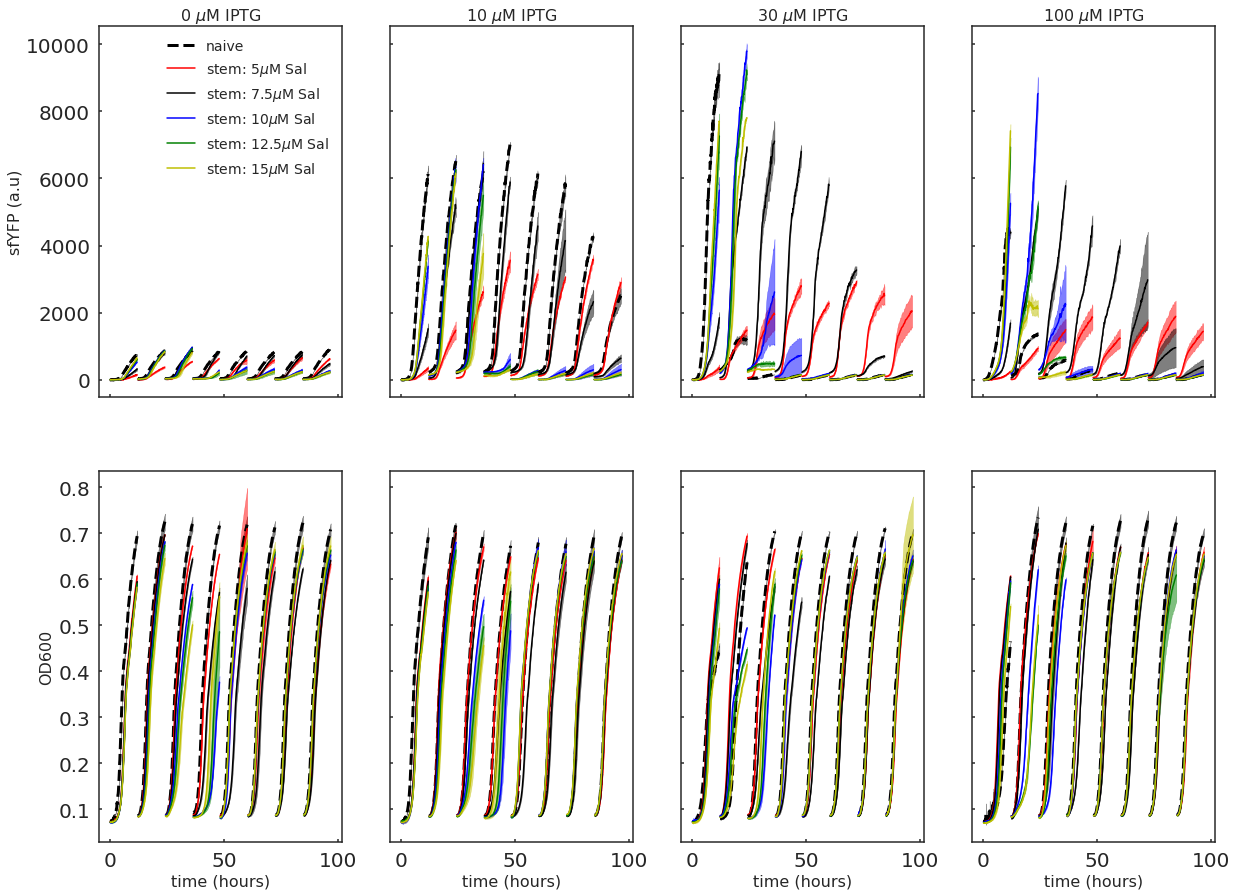

In [34]:
# For the case of + chlor
time = OD_data_concat_avgs['Time (hr)'].unique()

sal_concs = np.array([5,7.5,10,12.5,15])
iptg_concs = np.array([0,10,30,100])
las_conc = 3
chlor = '+'
fig, ax = plt.subplots(2,4,figsize=(20,15),sharex=True, sharey='row')

for i, iptg_conc in enumerate(iptg_concs): 
    for k, plate in enumerate(np.arange(1,10)):
        # YFP
        t = YFP_data_concat_avgs.loc[(YFP_data_concat_avgs.strain=='ctrl') & (YFP_data_concat_avgs.sal==0) & \
                                 (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate),
                                     'Time (hr)'].values
        avg = YFP_data_concat_avgs.loc[(YFP_data_concat_avgs.strain=='ctrl') & (YFP_data_concat_avgs.sal==0) & \
                                 (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate),
                                   'Measurement'].values
        var = YFP_data_concat_vars.loc[(YFP_data_concat_avgs.strain=='ctrl') & (YFP_data_concat_avgs.sal==0) & \
                                 (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate),
                                   'Measurement'].values
        ax[0,i].plot(t, avg, '--', color = 'black',linewidth=3)

        ax[0,i].fill_between(t, avg - np.sqrt(var), avg + np.sqrt(var), color = 'black',alpha=0.5)

        # OD
        t = OD_data_concat_avgs.loc[(OD_data_concat_avgs.strain=='ctrl') & (OD_data_concat_avgs.sal==0) & \
                                 (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate),
                                 'Time (hr)'].values
        avg = OD_data_concat_avgs.loc[(OD_data_concat_avgs.strain=='ctrl') & (OD_data_concat_avgs.sal==0) & \
                                 (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate),
                                   'Measurement'].values
        var = OD_data_concat_vars.loc[(OD_data_concat_vars.strain=='ctrl') & (OD_data_concat_vars.sal==0) & \
                                 (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate),
                                   'Measurement'].values
        ax[1,i].plot(t, avg, '--',color = 'black',linewidth=3)

        ax[1,i].fill_between(t, avg - np.sqrt(var), avg + np.sqrt(var), color = 'black',alpha=0.5)
        for j, sal_conc in enumerate(sal_concs):
            # YFP
            t = YFP_data_concat_avgs.loc[(YFP_data_concat_avgs.strain=='stem') & (YFP_data_concat_avgs.sal==sal_conc) & \
                                     (YFP_data_concat_avgs.las==las_conc) & (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate) & (YFP_data_concat_avgs.chlor==chlor),
                                     'Time (hr)'].values
            avg = YFP_data_concat_avgs.loc[(YFP_data_concat_avgs.strain=='stem') & (YFP_data_concat_avgs.sal==sal_conc) & \
                                     (YFP_data_concat_avgs.las==las_conc) & (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate)& (YFP_data_concat_avgs.chlor==chlor),
                                       'Measurement'].values
            var = YFP_data_concat_vars.loc[(YFP_data_concat_vars.strain=='stem') & (YFP_data_concat_vars.sal==sal_conc) & \
                                     (YFP_data_concat_vars.las==las_conc) & (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate)& (YFP_data_concat_avgs.chlor==chlor),
                                       'Measurement'].values
            ax[0,i].plot(t, avg, color = sns.color_palette()[j])

            ax[0,i].fill_between(t, avg - np.sqrt(var), avg + np.sqrt(var), color=sns.color_palette()[j],alpha=0.5)

            # OD
            t = OD_data_concat_avgs.loc[(OD_data_concat_avgs.strain=='stem') & (OD_data_concat_avgs.sal==sal_conc) & \
                                     (OD_data_concat_avgs.las==las_conc) & (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate)& (OD_data_concat_avgs.chlor==chlor),
                                     'Time (hr)'].values
            avg = OD_data_concat_avgs.loc[(OD_data_concat_avgs.strain=='stem') & (OD_data_concat_avgs.sal==sal_conc) & \
                                     (OD_data_concat_avgs.las==las_conc) & (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate)& (OD_data_concat_avgs.chlor==chlor),
                                       'Measurement'].values
            var = OD_data_concat_vars.loc[(OD_data_concat_vars.strain=='stem') & (OD_data_concat_vars.sal==sal_conc) & \
                                     (OD_data_concat_vars.las==las_conc) & (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate)& (OD_data_concat_avgs.chlor==chlor),
                                       'Measurement'].values
            ax[1,i].plot(t, avg, color = sns.color_palette()[j])

            ax[1,i].fill_between(t, avg - np.sqrt(var), avg + np.sqrt(var), color = sns.color_palette()[j],alpha=0.5)

        ax[1,i].set_xlabel('time (hours)',fontsize=16)
        ax[0,i].set_title(str(iptg_conc) + ' $\mu$M IPTG',fontsize=16)
ax[0,0].set_ylabel('sfYFP (a.u)',fontsize=16)
ax[1,0].set_ylabel('OD600',fontsize=16)
ax[0,0].legend(['naive','stem: 5$\mu$M Sal','stem: 7.5$\mu$M Sal','stem: 10$\mu$M Sal',
                'stem: 12.5$\mu$M Sal','stem: 15$\mu$M Sal'])

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


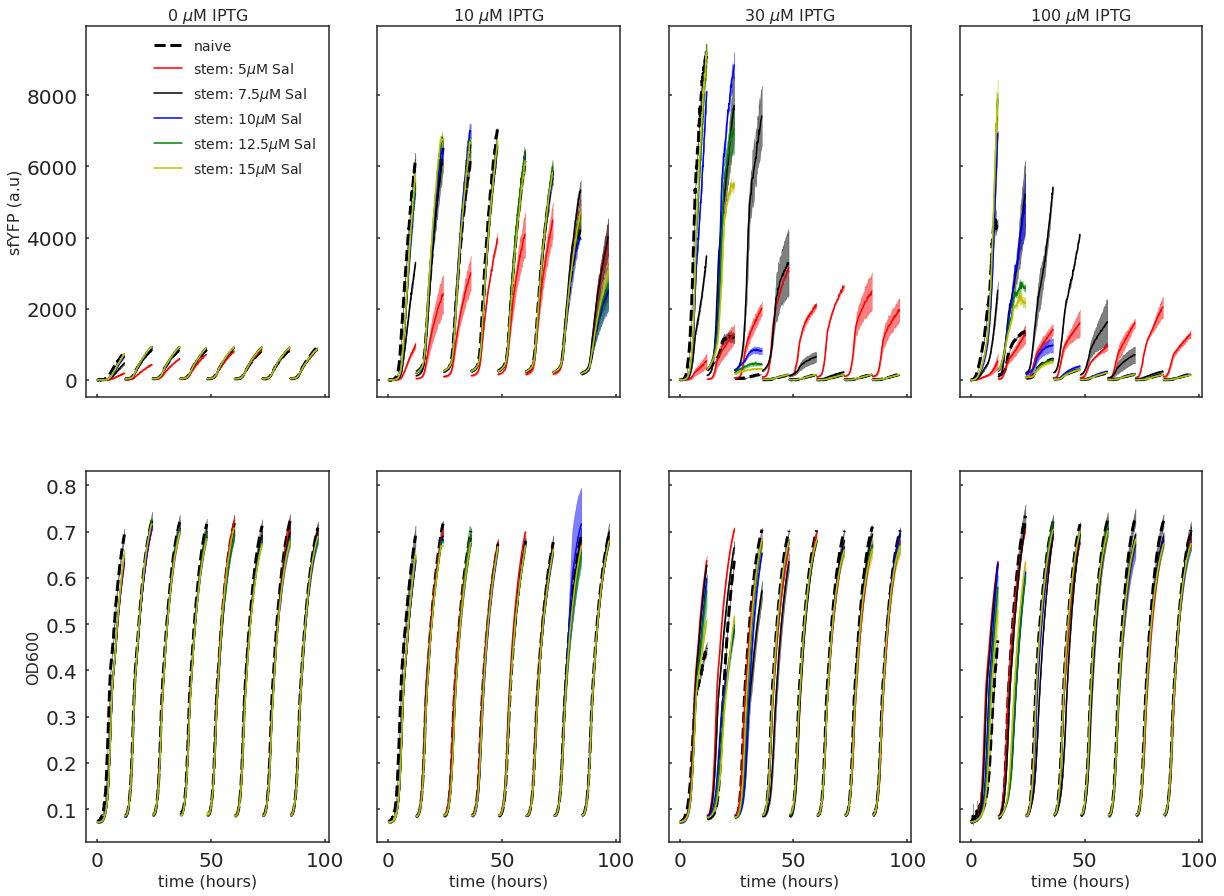

In [35]:
# For the case of - chlor
time = OD_data_concat_avgs['Time (hr)'].unique()

sal_concs = np.array([5,7.5,10,12.5,15])
iptg_concs = np.array([0,10,30,100])
las_conc = 3
chlor = '-'
fig, ax = plt.subplots(2,4,figsize=(20,15),sharex=True, sharey='row')

for i, iptg_conc in enumerate(iptg_concs): 
    for k, plate in enumerate(np.arange(1,10)):
        # YFP
        t = YFP_data_concat_avgs.loc[(YFP_data_concat_avgs.strain=='ctrl') & (YFP_data_concat_avgs.sal==0) & \
                                 (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate),
                                     'Time (hr)'].values
        avg = YFP_data_concat_avgs.loc[(YFP_data_concat_avgs.strain=='ctrl') & (YFP_data_concat_avgs.sal==0) & \
                                 (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate),
                                   'Measurement'].values
        var = YFP_data_concat_vars.loc[(YFP_data_concat_avgs.strain=='ctrl') & (YFP_data_concat_avgs.sal==0) & \
                                 (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate),
                                   'Measurement'].values
        ax[0,i].plot(t, avg, '--', color = 'black',linewidth=3)

        ax[0,i].fill_between(t, avg - np.sqrt(var), avg + np.sqrt(var), color = 'black',alpha=0.5)

        # OD
        t = OD_data_concat_avgs.loc[(OD_data_concat_avgs.strain=='ctrl') & (OD_data_concat_avgs.sal==0) & \
                                 (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate),
                                 'Time (hr)'].values
        avg = OD_data_concat_avgs.loc[(OD_data_concat_avgs.strain=='ctrl') & (OD_data_concat_avgs.sal==0) & \
                                 (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate),
                                   'Measurement'].values
        var = OD_data_concat_vars.loc[(OD_data_concat_vars.strain=='ctrl') & (OD_data_concat_vars.sal==0) & \
                                 (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate),
                                   'Measurement'].values
        ax[1,i].plot(t, avg, '--',color = 'black',linewidth=3)

        ax[1,i].fill_between(t, avg - np.sqrt(var), avg + np.sqrt(var), color = 'black',alpha=0.5)
        for j, sal_conc in enumerate(sal_concs):
            # YFP
            t = YFP_data_concat_avgs.loc[(YFP_data_concat_avgs.strain=='stem') & (YFP_data_concat_avgs.sal==sal_conc) & \
                                     (YFP_data_concat_avgs.las==las_conc) & (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate) & (YFP_data_concat_avgs.chlor==chlor),
                                     'Time (hr)'].values
            avg = YFP_data_concat_avgs.loc[(YFP_data_concat_avgs.strain=='stem') & (YFP_data_concat_avgs.sal==sal_conc) & \
                                     (YFP_data_concat_avgs.las==las_conc) & (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate)& (YFP_data_concat_avgs.chlor==chlor),
                                       'Measurement'].values
            var = YFP_data_concat_vars.loc[(YFP_data_concat_vars.strain=='stem') & (YFP_data_concat_vars.sal==sal_conc) & \
                                     (YFP_data_concat_vars.las==las_conc) & (YFP_data_concat_avgs.iptg==iptg_conc) & \
                                 (YFP_data_concat_avgs.plate==plate)& (YFP_data_concat_avgs.chlor==chlor),
                                       'Measurement'].values
            ax[0,i].plot(t, avg, color = sns.color_palette()[j])

            ax[0,i].fill_between(t, avg - np.sqrt(var), avg + np.sqrt(var), color=sns.color_palette()[j],alpha=0.5)

            # OD
            t = OD_data_concat_avgs.loc[(OD_data_concat_avgs.strain=='stem') & (OD_data_concat_avgs.sal==sal_conc) & \
                                     (OD_data_concat_avgs.las==las_conc) & (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate)& (OD_data_concat_avgs.chlor==chlor),
                                     'Time (hr)'].values
            avg = OD_data_concat_avgs.loc[(OD_data_concat_avgs.strain=='stem') & (OD_data_concat_avgs.sal==sal_conc) & \
                                     (OD_data_concat_avgs.las==las_conc) & (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate)& (OD_data_concat_avgs.chlor==chlor),
                                       'Measurement'].values
            var = OD_data_concat_vars.loc[(OD_data_concat_vars.strain=='stem') & (OD_data_concat_vars.sal==sal_conc) & \
                                     (OD_data_concat_vars.las==las_conc) & (OD_data_concat_avgs.iptg==iptg_conc) & \
                                 (OD_data_concat_avgs.plate==plate)& (OD_data_concat_avgs.chlor==chlor),
                                       'Measurement'].values
            ax[1,i].plot(t, avg, color = sns.color_palette()[j])

            ax[1,i].fill_between(t, avg - np.sqrt(var), avg + np.sqrt(var), color = sns.color_palette()[j],alpha=0.5)

        ax[1,i].set_xlabel('time (hours)',fontsize=16)
        ax[0,i].set_title(str(iptg_conc) + ' $\mu$M IPTG',fontsize=16)
ax[0,0].set_ylabel('sfYFP (a.u)',fontsize=16)
ax[1,0].set_ylabel('OD600',fontsize=16)
ax[0,0].legend(['naive','stem: 5$\mu$M Sal','stem: 7.5$\mu$M Sal','stem: 10$\mu$M Sal',
                'stem: 12.5$\mu$M Sal','stem: 15$\mu$M Sal'])

In [14]:
YFP_ending_concs.head()

,plate,strain,sal,las,iptg,chlor,replicate,Measurement
0,1,HCA_1,0.0,0,0,-,1,11.0
1,1,HCA_1,0.0,0,0,-,2,11.0
2,1,HCA_2,0.0,0,0,-,1,12.0
3,1,HCA_2,0.0,0,0,-,2,12.0
4,1,HCA_3,0.0,0,0,-,1,11.0


Now we can look at just the ending values of sfYFP, and see the total production:

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


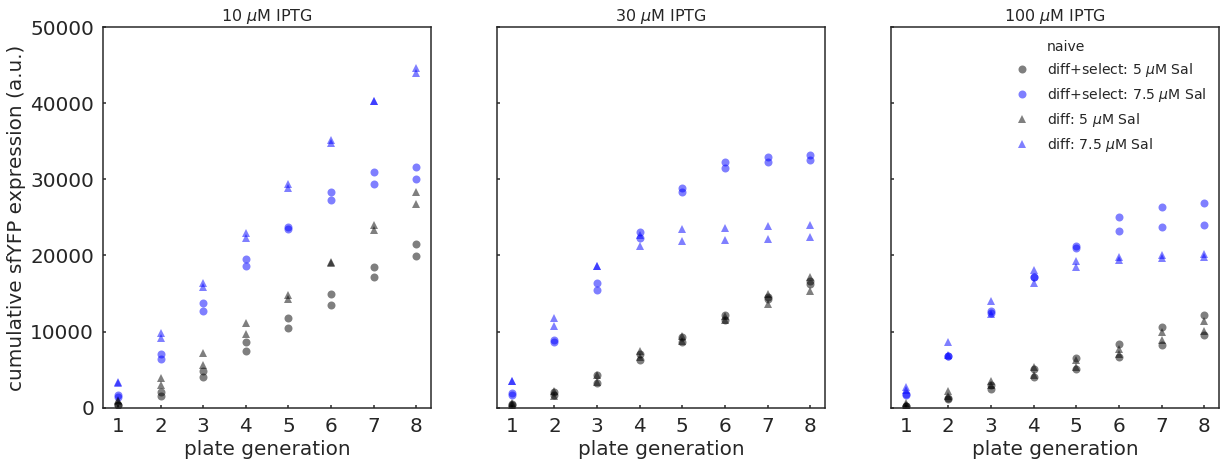

In [17]:
fig, ax = plt.subplots(1,3,figsize=(20,7),sharey='row')
iptg_concs = np.array([10,30,100])
sal_concs = np.array([5,7.5])
chlor = np.array(['-','+'])
las_conc = 3

chlor = '+'

for i, iptg_conc in enumerate(iptg_concs): 
    for k, rep in enumerate(np.array([1,2])):
        x = YFP_ending_concs.loc[(YFP_ending_concs.strain=='ctrl') & \
                                        (YFP_ending_concs.iptg==iptg_conc) & \
                                        (YFP_ending_concs.replicate==rep),
                                       'plate'].values
        y = YFP_ending_concs.loc[(YFP_ending_concs.strain=='ctrl') & \
                                        (YFP_ending_concs.iptg==iptg_conc) & \
                                        (YFP_ending_concs.replicate==rep),
                                       'Measurement'].values
        ax[i].plot(x,y.cumsum(),'x',color=sns.color_palette()[0],ms=8)
        for j, sal_conc in enumerate(sal_concs):
            x = YFP_ending_concs.loc[(YFP_ending_concs.strain=='stem') & (YFP_ending_concs.sal==sal_conc) & \
                                         (YFP_ending_concs.las==las_conc) & (YFP_ending_concs.iptg==iptg_conc) & \
                                     (YFP_ending_concs.chlor==chlor)& (YFP_ending_concs.replicate==rep),
                                           'plate'].values
            y = YFP_ending_concs.loc[(YFP_ending_concs.strain=='stem') & (YFP_ending_concs.sal==sal_conc) & \
                                         (YFP_ending_concs.las==las_conc) & (YFP_ending_concs.iptg==iptg_conc) & \
                                     (YFP_ending_concs.chlor==chlor)& (YFP_ending_concs.replicate==rep),
                                           'Measurement'].values
            ax[i].plot(x,y.cumsum(),'o',alpha=0.5,color=sns.color_palette()[j+1],ms=8)
        for j, sal_conc in enumerate(sal_concs):
            x = YFP_ending_concs.loc[(YFP_ending_concs.strain=='stem') & (YFP_ending_concs.sal==sal_conc) & \
                                         (YFP_ending_concs.las==las_conc) & (YFP_ending_concs.iptg==iptg_conc) & \
                                     (YFP_ending_concs.chlor=='-')& (YFP_ending_concs.replicate==rep),
                                           'plate'].values
            y = YFP_ending_concs.loc[(YFP_ending_concs.strain=='stem') & (YFP_ending_concs.sal==sal_conc) & \
                                         (YFP_ending_concs.las==las_conc) & (YFP_ending_concs.iptg==iptg_conc) & \
                                     (YFP_ending_concs.chlor=='-')& (YFP_ending_concs.replicate==rep),
                                           'Measurement'].values
            ax[i].plot(x,y.cumsum(),'^',alpha=0.5,color=sns.color_palette()[j+1],ms=8)
    ax[i].set_xticks(np.array([1,2,3,4,5,6,7,8]))
    ax[i].set_xlabel('plate generation',fontsize=20)
ax[0].set_ylabel('cumulative sfYFP expression (a.u.)',fontsize=20)
ax[0].set_title('10 $\mu$M IPTG')
ax[1].set_title('30 $\mu$M IPTG')
ax[2].set_title('100 $\mu$M IPTG')
ax[0].set_ylim(0,50000)
ax[2].legend(['naive','diff+select: 5 $\mu$M Sal','diff+select: 7.5 $\mu$M Sal',
             'diff: 5 $\mu$M Sal','diff: 7.5 $\mu$M Sal',])
